In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np

In [4]:
np.random.rand()

0.0865701297356597

In [5]:
def is_winner(win_rate):
    roll = np.random.rand()
    if win_rate > roll:
        return True
    else:
        return False

In [6]:
wins = 0
for x in range(100000):
    if is_winner(.5):
        wins += 1
wins / 100000

0.50098

In [5]:
division_names = {0: 'amber', 1: 'emerald', 2: 'sapphire', 3: 'ruby', 4:'diamond', 5:'legendary'}
division_tiers = {'amber': 5, 'emerald': 5, 'sapphire': 5, 'ruby': 6, 'diamond': 7, 'legendary': 5}
tier_size = {'amber': 3, 'emerald': 4, 'sapphire': 5, 'ruby': 5, 'diamond': 5, 'legendary': 5}

In [6]:
class pvp_player():
    
    def __init__(self, win_rate=0.5):
        self.div_ix = 0
        self.win_streak = 0
        self.pips = {'amber': 0,
                     'emerald': 0,
                     'sapphire': 0,
                     'ruby': 0,
                     'diamond': 0,
                     'legendary': 0,
                     'legend_rolls': 0
                    }
        self.win_rate = win_rate
    
    def __str__(self):
        tier = self.current_tier()
        division = self.division_name()
  
        base = 'Division: {division}'.format(division=division)
        if division == 'legendary':
            base += 'x{rolls}'.format(rolls=self.pips['legend_rolls'])
            
        return base + '\n\tTier {tier}\n\tPips {pips}\n'.format(tier = tier,
                                                      pips = self.pips[division]
                                                     )
    
    def play_game(self):
        roll = np.random.rand()
        if self.win_rate > roll:
            return True
        else:
            return False        
        
    def division_name(self):
        return division_names[self.div_ix]
    
    def div_tier_max(self, division):
        return division_tiers[division]
    
    
    def current_tier(self):
        cur_div_name = self.division_name()
        return self.pips[cur_div_name] // tier_size[cur_div_name] + 1
    
    def update_game(self, result):
        if self.div_ix == 0:
            self.easy_game(result)
        elif self.div_ix in [1,2]:
            self.med_game(result)
        else:
            self.hard_game(result)

            
    def easy_game(self, result):
        division = self.division_name()
        
        if result: # win
            if self.win_streak > 2 or self.win_streak < -2:
                self.pips[division] += 2
            else:
                self.pips[division] += 1
            self.win_streak += 1
            
        else: # loss
            if self.win_streak < 0:
                self.win_streak -= 1
            else:
                self.win_streak = 0

                
        if self.current_tier() == self.div_tier_max(division) + 1:
            self.div_ix += 1
            
    def med_game(self, result):
        division = self.division_name()
        
        if result:
            self.pips[division] += 1
        elif self.pips[division] % 5 == 0:
            pass
        else:
            self.pips[division] -= 1

            
        if self.current_tier() == self.div_tier_max(division) + 1:
            self.div_ix += 1

    def hard_game(self, result):
        division = self.division_name()
        
        if result:
            self.pips[division] += 1
        elif self.pips[division] == 0:
            pass
        else:
            self.pips[division] -= 1

        if self.current_tier() == self.div_tier_max(division) + 1:
            if self.division_name() != 'legendary':
                self.div_ix += 1
            else:
                self.pips['legendary'] = 0
                self.pips['legend_rolls'] += 1
    def reached_target(self, target):
        if self.pips[target] == self.div_tier_max(target) * 5 or self.pips['legend_rolls'] == 1:
            return True

In [7]:
def sim_season(target='legendary', win_rate=0.5):
    contestant = pvp_player(win_rate=win_rate)
    game = 0
    
    while game < 1000:
        result = contestant.play_game()
        game += 1
        contestant.update_game(result)
        if contestant.reached_target(target):
            break
    return game, contestant.pips

In [8]:
from collections import defaultdict
def get_average_target(target, rates, means):
    measures = defaultdict(list)

    for r in rates:
        for x in range(2000):
            count, aux = sim_season(target=target, win_rate=r)
            measures[r].append(count)

    version = 0
    test_key = target
    while test_key in means:
        test_key = target + str(version)
        version += 1

    means[test_key] = {}
    for r, values in measures.iteritems():
        means[test_key][r] = np.mean(values), np.std(values)

In [9]:
means = {}

In [10]:
rates = [0.1, 0.25, 0.33, 0.4, 0.45, 0.48, 0.5, 0.52, 0.55, 0.6, 0.66, 0.75, 0.9, 1.0]

for target in ['amber', 'emerald', 'sapphire', 'ruby', 'diamond', 'legendary']:
    get_average_target(target, rates, means)

In [11]:
win_pct_org = defaultdict(list)
for x in means:
    for v in means[x]:
        val = means[x][v]
        win_pct_org[v].append( (x,val))
win_pct_org = dict(win_pct_org)

In [12]:
for x in means:
    print(x)
    for v in sorted(means[x].keys()):
        if means[x][v][0] + 3*means[x][v][1] > 2000:
            continue
        else:
            print(v, means[x][v])

amber
0.1 (1000.0, 0.0)
0.25 (1000.0, 0.0)
0.33 (1000.0, 0.0)
0.4 (1000.0, 0.0)
0.45 (1000.0, 0.0)
0.48 (999.90300000000002, 4.3368872477848877)
0.5 (999.95100000000002, 1.8040507199078102)
0.52 (992.67700000000002, 34.780018271991402)
0.55 (896.21100000000001, 121.00921650436366)
0.6 (591.1155, 100.40846159437949)
0.66 (403.99349999999998, 52.317066601157983)
0.75 (278.40750000000003, 26.380019782972099)
0.9 (183.602, 9.1450312191921945)
1.0 (150.0, 0.0)
diamond
0.1 (1000.0, 0.0)
0.25 (1000.0, 0.0)
0.33 (1000.0, 0.0)
0.4 (1000.0, 0.0)
0.45 (1000.0, 0.0)
0.48 (999.19550000000004, 13.014003217687755)
0.5 (993.82899999999995, 34.805369686299613)
0.52 (949.28599999999994, 104.39670111646166)
0.55 (758.05050000000006, 163.91624370314855)
0.6 (477.43450000000001, 86.628048054599518)
0.66 (332.04199999999997, 46.041798791967231)
0.75 (229.41399999999999, 23.372047492678107)
0.9 (152.27799999999999, 8.4264889485478953)
1.0 (125.0, 0.0)
sapphire
0.1 (1000.0, 0.0)
0.25 (1000.0, 0.0)
0.33 (989.6

In [ ]:
for v in sorted(win_pct_org.keys()):
    print(v)
    for x in win_pct_org[v]:
        print(x)

In [ ]:
x = sorted(means['amber'].keys())
seqs = []
names = []
for name in means:
    names.append(name)
    this_seq = []
    for v in sorted(means[name].keys()):
        this_seq.append(means[name][v][0])
    seqs.append(this_seq)

In [ ]:
%pylab inline
import matplotlib.pyplot as plt

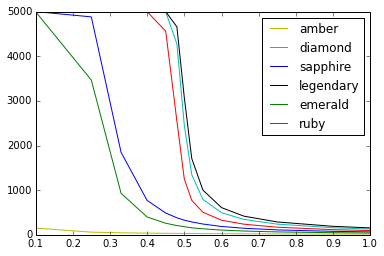

In [186]:
fig, ax = plt.subplots()
colors = {'amber': 'y', 'emerald': 'g', 'sapphire': 'b', 'ruby': 'r', 'diamond': 'c', 'legendary': 'k'}

ax.set_xlim([0.1, 1.0])
ax.set_ylim([0,5000])
for n, data in zip(names, seqs):
    ax.plot(x, data, colors[n], label=n)
#ax.plot(alphas, saved_test, 'g.--', label='Test')
#ax.set_ylabel('Order Count')
ax.legend(loc='best')




